# Exploratory Data Analysis

In this Notebook I will be doing some basic EDA to try to understand the NBA Stats per season. I have gathered data from the past 30 years which I will be using to understand the game's evolution as well as a complimentary analysis to this project. 

Many NBA Analyst discuss on a consistent basis how the basketball game has changed in the past decades. Before it used to be more physical and a lot more contact was allowed by the referees compared to today. this has causes that thee defense has loosen up and therefore teams are having easier times to score. What is called the lane (around the rim), is less protected and therefore players can get closer to the basket. I'm not sure if this has increase thee Field Goal Percentage but it is something that I will find out on this document. 

Today's mentality is more offense based. Many coaches believe that they can outscore their opponent's defense, however most, is not all of the recent champions have had a strong defense but very strong offense as well. So it has been a combination of both that has taken teams to success. 

As always, I will start by loading the libraries and the data that I will be using. Once loaded, even though it has been previously cleaned by myself, I will have a quick look at it. 

## Libraries and Data Loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

pd.set_option('display.max_columns', None)

The first dataframe that I will be exploring has a series of stats that are average all many categories per game for all teams (30). I will try to find any trends, or game changes with time, that would suggest that I should be using any of those stats columns for the predictions that I want to achieve as well.

In [63]:
df = pd.read_excel('2000-2020_League_Stats.xlsx')
df.head(30)

,Season,Age,Wt,G,FG,FGA,3P,3PA,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,FG%,3P%,FT%,Pace,eFG%,TOV%,ORB%,FT/FGA,ORtg
0,2020,26.1,216,1059,40.9,88.8,12.2,34.1,17.9,23.1,10.1,34.8,44.8,24.4,7.6,4.9,14.5,20.8,111.8,0.460,0.358,0.773,100.3,0.529,12.8,22.5,0.201,110.6
1,2019,26.3,217,1230,41.1,89.2,11.4,32.0,17.7,23.1,10.3,34.8,45.2,24.6,7.6,5.0,14.1,20.9,111.2,0.461,0.355,0.766,100.0,0.524,12.4,22.9,0.198,110.4
2,2018,26.4,219,1230,39.6,86.1,10.5,29.0,16.6,21.7,9.7,33.8,43.5,23.2,7.7,4.8,14.3,19.9,106.3,0.460,0.362,0.767,97.3,0.521,13.0,22.3,0.193,108.6
3,2017,26.6,220,1230,39.0,85.4,9.7,27.0,17.8,23.1,10.1,33.4,43.5,22.6,7.7,4.7,14.0,19.9,105.6,0.457,0.358,0.772,96.4,0.514,12.7,23.3,0.209,108.8
4,2016,26.7,221,1230,38.2,84.6,8.5,24.1,17.7,23.4,10.4,33.3,43.8,22.3,7.8,5.0,14.4,20.3,102.7,0.452,0.354,0.757,95.8,0.502,13.2,23.8,0.209,106.4
5,2015,26.7,222,1230,37.5,83.6,7.8,22.4,17.1,22.8,10.9,32.4,43.3,22.0,7.7,4.8,14.4,20.2,100.0,0.449,0.350,0.750,93.9,0.496,13.3,25.1,0.205,105.6
6,2014,26.5,223,1230,37.7,83.0,7.7,21.5,17.8,23.6,10.9,31.8,42.7,22.0,7.7,4.7,14.6,20.7,101.0,0.454,0.360,0.756,93.9,0.501,13.6,25.5,0.215,106.6
7,2013,26.7,223,1229,37.1,82.0,7.2,20.0,16.7,22.2,11.2,31.0,42.1,22.1,7.8,5.1,14.6,19.8,98.1,0.453,0.359,0.753,92.0,0.496,13.7,26.5,0.204,105.8
8,2012,26.6,223,990,36.5,81.4,6.4,18.4,16.9,22.5,11.4,30.8,42.2,21.0,7.7,5.1,14.6,19.6,96.3,0.448,0.349,0.752,91.3,0.487,13.8,27.0,0.208,104.6
9,2011,26.6,223,1230,37.2,81.2,6.5,18.0,18.6,24.4,10.9,30.5,41.4,21.5,7.3,4.9,14.3,20.7,99.6,0.459,0.358,0.763,92.1,0.498,13.4,26.4,0.229,107.3


In [3]:
df.shape

(31, 28)

So I have here 31 years of data (31 seasons) and 28 Stats Columns to play with

In [4]:
df.describe()

,Season,Age,Wt,G,FG,FGA,3P,3PA,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,FG%,3P%,FT%,Pace,eFG%,TOV%,ORB%,FT/FGA,ORtg
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,2005.000000,26.970968,217.096774,1166.032258,37.738710,82.709677,6.116129,17.270968,18.790323,24.948387,11.870968,30.612903,42.490323,22.441935,7.874194,5.000000,14.929032,21.632258,100.403226,0.456065,0.351548,0.753645,93.480645,0.492968,13.748387,27.970968,0.227548,106.558065
std,9.092121,0.481798,4.700034,103.156995,2.064248,3.077158,2.471180,6.731924,1.276807,1.776114,1.286389,1.797358,1.072491,1.344811,0.472559,0.214476,0.690987,1.191186,4.983672,0.010099,0.011360,0.011462,3.113671,0.015160,0.606559,3.134559,0.016709,2.091216
min,1990.000000,26.100000,208.000000,725.000000,34.200000,78.200000,2.200000,6.600000,16.600000,21.700000,9.700000,28.400000,41.000000,20.600000,7.200000,4.600000,14.000000,19.600000,91.600000,0.437000,0.320000,0.728000,88.900000,0.466000,12.400000,22.300000,0.193000,102.200000
25%,1997.500000,26.600000,213.500000,1107.000000,36.150000,80.450000,4.800000,13.700000,17.850000,23.500000,10.950000,29.300000,41.650000,21.400000,7.600000,4.850000,14.400000,20.750000,96.950000,0.449000,0.348000,0.749000,91.150000,0.483500,13.300000,26.350000,0.212000,105.300000
50%,2005.000000,26.900000,219.000000,1189.000000,37.200000,81.500000,5.900000,16.000000,18.700000,24.900000,12.000000,30.300000,42.300000,22.000000,7.800000,5.000000,14.600000,21.800000,99.900000,0.457000,0.355000,0.754000,92.400000,0.493000,13.700000,28.200000,0.231000,106.600000
75%,2012.500000,27.200000,220.500000,1230.000000,39.150000,85.000000,6.900000,19.200000,19.600000,26.300000,12.650000,30.900000,43.200000,23.300000,8.250000,5.150000,15.550000,22.500000,104.000000,0.461000,0.358500,0.761000,96.100000,0.500000,14.200000,30.700000,0.243000,108.050000
max,2020.000000,27.900000,223.000000,1230.000000,41.500000,89.200000,12.200000,34.100000,21.800000,28.500000,14.400000,34.800000,45.200000,24.900000,8.900000,5.500000,16.100000,23.500000,111.800000,0.476000,0.367000,0.773000,100.300000,0.529000,14.800000,32.900000,0.250000,110.600000


The ORtg corresponds to an estimate of points produced (players) or scored (teams) per 100 possessions. I will attempt first to see how this value has evolved through time. 

In [5]:
df.columns

Index(['Season', 'Age', 'Wt', 'G', 'FG', 'FGA', '3P', '3PA', 'FT', 'FTA',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'FG%',
       '3P%', 'FT%', 'Pace', 'eFG%', 'TOV%', 'ORB%', 'FT/FGA', 'ORtg'],
      dtype='object')

Ok, so everything seems to be in place, so I will first look at the players Age and Weight. I won't look at the height as the values have not change that much and are always moving from 6.5 to 6.6 feet tall. So even when analysts say that today the players are smaller and that the bigs have lost relevance, it is true, but the average of close to 400 players has always stayed the same. What has change is that the most dominant players are not the 7 footers anymore, but players between 6.2 to 6.6 with a few exceptions such as Lebron James, Kevin Durant, and Antony Davis. If not you can see that PG (Point Guards) and SG (Shooting Guards) are scoring quite a lot compared to be really tall players. 

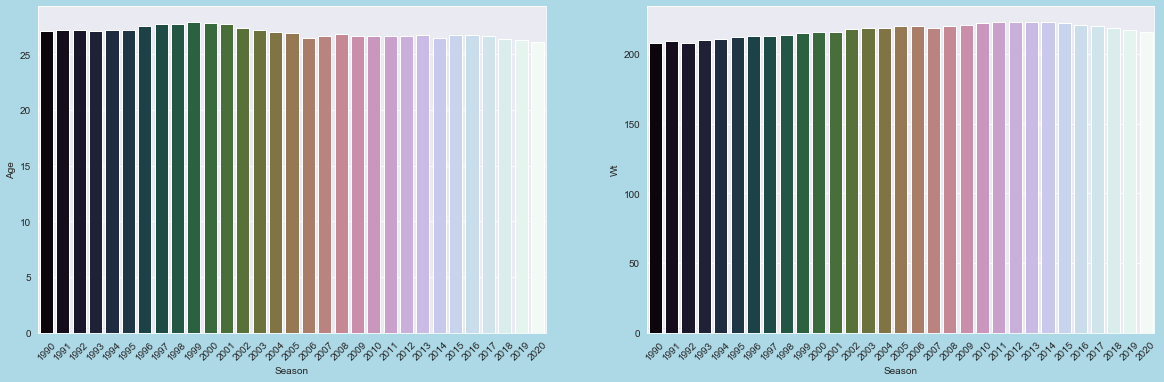

In [54]:
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

chart1 = sns.barplot(ax=axis[0], x='Season', y='Age', data=df, palette='cubehelix')
chart2 = sns.barplot(ax=axis[1], x='Season', y='Wt', data=df, palette='cubehelix')
chart1.set_xticklabels(chart1.get_xticklabels(), rotation=45)
chart2.set_xticklabels(chart2.get_xticklabels(), rotation=45)

plt.show()

This clearly doesn't do the trick, so lets go for a more basic plot and see if there is any trend changes or not. I will create a function and try to get a good plot that I can consistently use within my data:

In [68]:
def evolution_plot(feature):
    plt.figure(figsize=(20,6))
    plt.plot(df.Season, feature, color='red', linestyle='dashed', marker='o',
         markerfacecolor='black', markersize=10)
    plt.rcParams["figure.facecolor"] = "lightblue"
    x_ticks = np.arange(1989, 2020, 1)
    plt.xticks(x_ticks)
    plt.grid(True)
    plt.xlabel('Season Year')

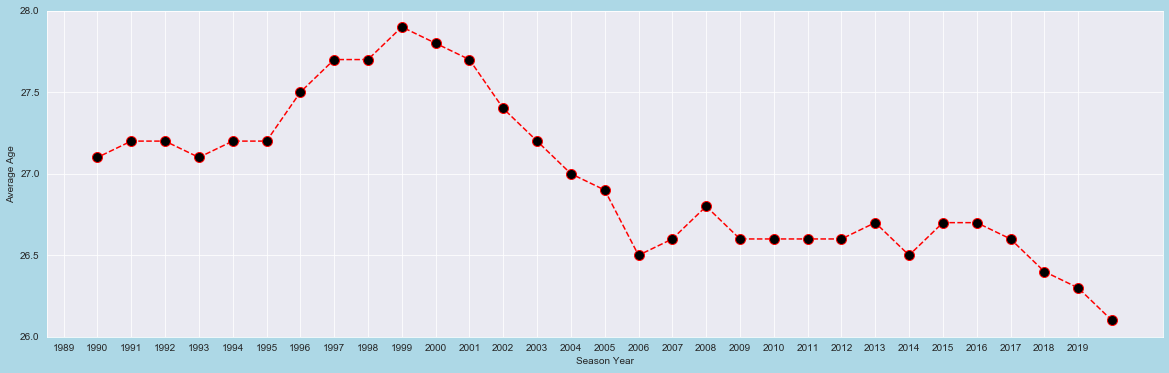

In [69]:
evolution_plot(df.Age)
y_ticks = np.arange(26, 28.5, 0.5)
plt.ylabel('Average Age')
plt.yticks(y_ticks)
plt.show()

Text(0, 0.5, 'Average Height')

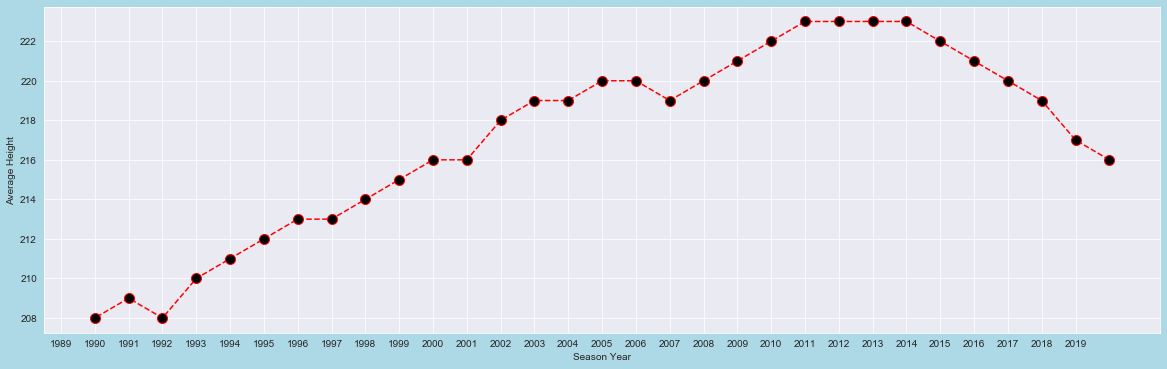

In [70]:
evolution_plot(df.Wt)
plt.ylabel('Average Height')

These last two plots work a lot better to analyze the player age and weight. The first plot is very simple to understand. It is suggesting that players are younger in average. This can be for a series of reasons which include earlier retirement due to injuries and/or players coming straight from high school, specially after seeing many succeed doing so. 

The weight is also understandable. In today's world, player workout more and as a result have become heavier but fitter. It is know that they are stronger, faster and considerably more athletic.

Let's look at the Defense and how it has evolve during the past three decades:

## Defensive Stats Analysis

### Steals Per Game (STL)

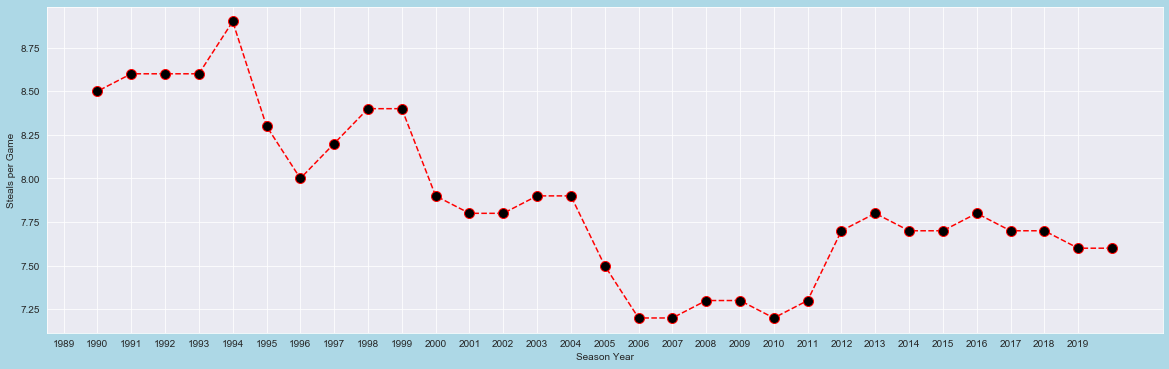

In [71]:
evolution_plot(df.STL)
plt.ylabel('Steals per Game')
plt.show()

Steals is a direct measurement of defense. Stronger defenders get more steals per game, and hence the teams with the strongest defense will get most steals, or will be at the top of the steals per game. This plot shows how defense got softer during the 2004 until 2011, and since then it has been been getting a bit better, but never at the level from the late 90s.

### Blocks per Game

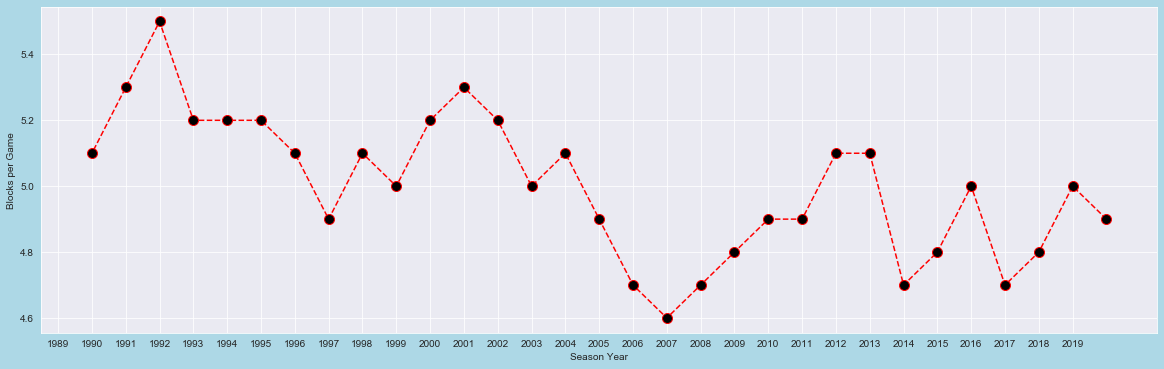

In [84]:
evolution_plot(df.BLK)
plt.ylabel('Blocks per Game')
plt.show()

Blocks per game is another stat/metrics that shows how tight your team's defense is. In average the blocks per game is lowering, they hit a low in 2007 and then increase again and now they are starting a possible lowering trend again. With the two previous metrics we already get an indication of the defense being softer today compared to 10 and 20 years ago

### Rebounds per Game

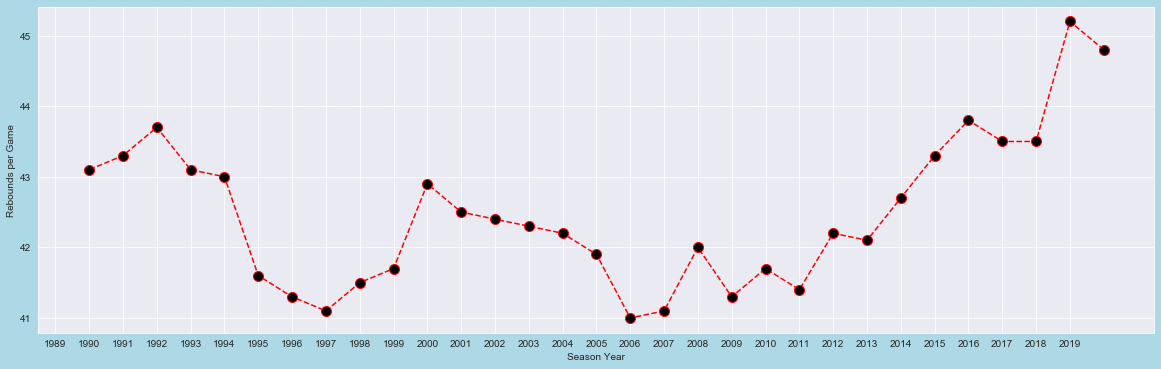

In [73]:
evolution_plot(df.TRB)
plt.ylabel('Rebounds per Game')
plt.show()

Some may think that Rebounds per game is another indication of how good a team's defense is. It is also related to the attacking team's offense. A good offense will most probably result sin a high field goal percentage, which will also translate as a low number of defensive/offensive rebounds available. But a poor offense will results in more rebounds available, so a high number of Defensive Rebounds suggests a strong defense as the attacking team is missing and you are defending your rim well enough not to make it an offensive rebound. Here you see the trend of Rebounds increasing lately and reaching values that were not present in the early 90s and even 00s. However in this case these number are more related to the pace of the game which has increased. This means that today's game is faster and therefore teams score and shoot more, and even with a stable field goal percentage, that results in more rebounds being available and not necessarily a stronger defense.

### Offensive Rebounds per Game

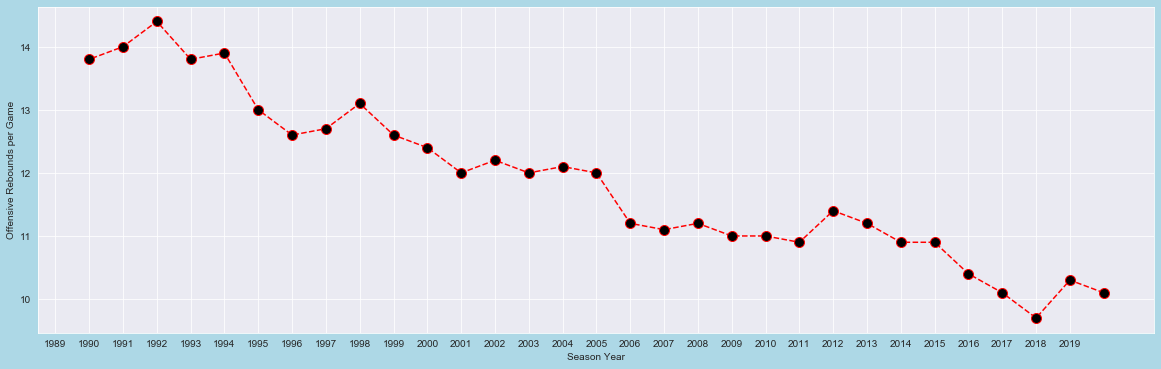

In [74]:
evolution_plot(df.ORB)
plt.ylabel('Offensive Rebounds per Game')
plt.show()

Following the previous comments, offensive rebounds have deepen quite a bit which would suggest a stronger defense from the defending team, but I will need to look at more stats to see if this is true or not. so far I don't believe it is

### Defensive Rebounds per Game

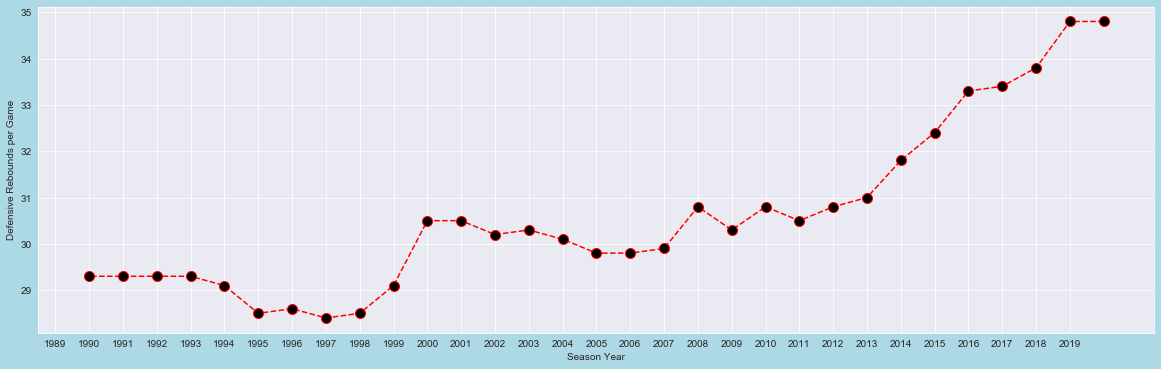

In [75]:
evolution_plot(df.DRB)
plt.ylabel('Defensive Rebounds per Game')
plt.show()

Less offensive rebounds mean more defensive rebounds, so this plot is properly aligned with the previous one (Offensive Rebounds)...lets keep on looking at other hints about the defense

### Personal Fouls

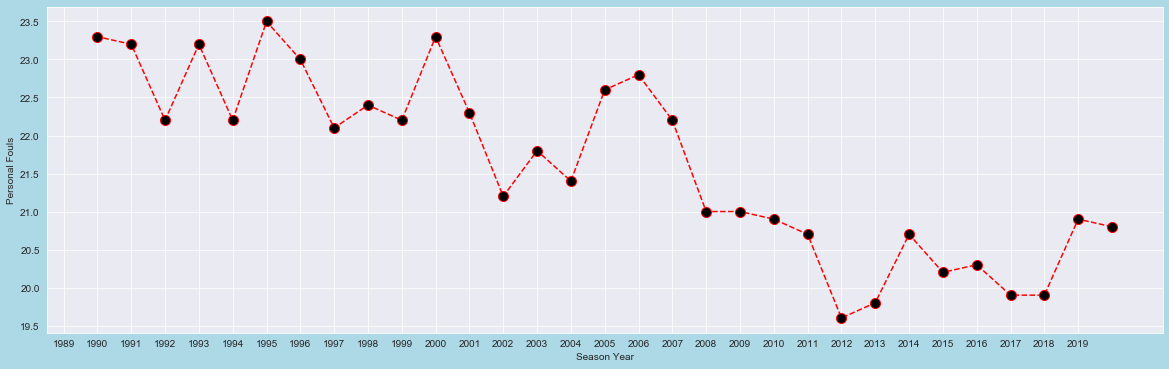

In [76]:
evolution_plot(df.PF)
plt.ylabel('Personal Fouls')
plt.show()

Less fouls means the game is less physical and there is less contact allowed. This also means that you try to steal the ball less, block/contest less shots, less fighting for offensive/defensive rebounds, and other stats related to defense. This is a good indication that the game's defense is weaker today than in the past.

## Offensive Stats Analysis

Now lets look at the key offensive stats and see what we get form them:

### Pace

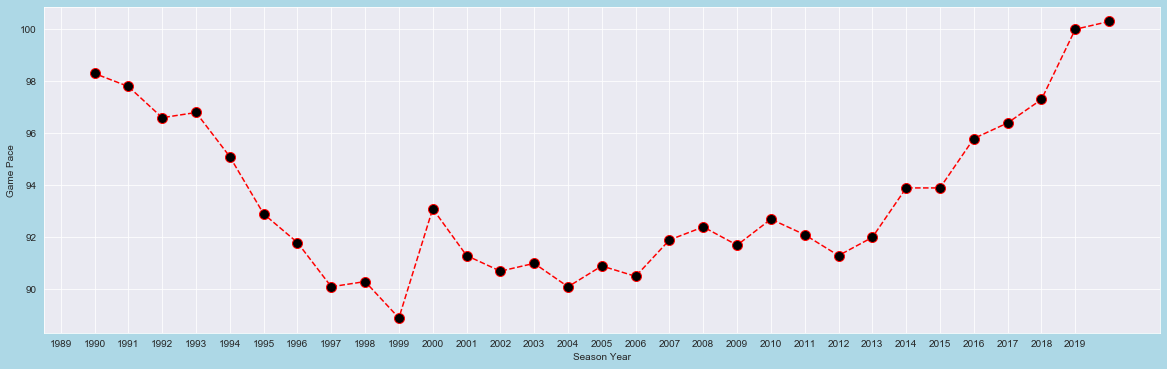

In [77]:
evolution_plot(df.Pace)
plt.ylabel('Game Pace')
plt.show()

The pace of the game is ass we mentioned above, faster than in the past. Players in average are more athletic and are stronger and as a result can play at a faster pace and can score more with a weaker defense and less contact being allowed

### Points per Game

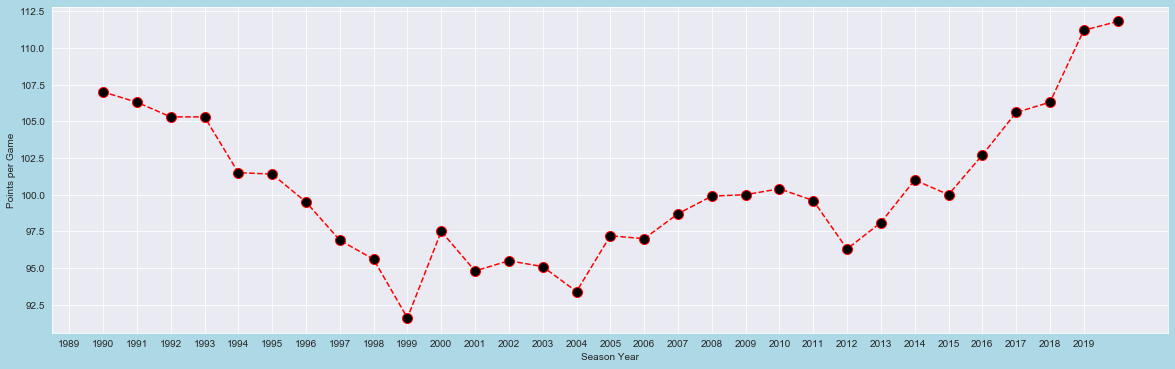

In [85]:
evolution_plot(df.PTS)
plt.ylabel('Points per Game')
plt.show()

This stat is related to the pace. With a faster game and with a weaker defense, teams score more and that is clearly shown on this plot...

### 3-Points per Game

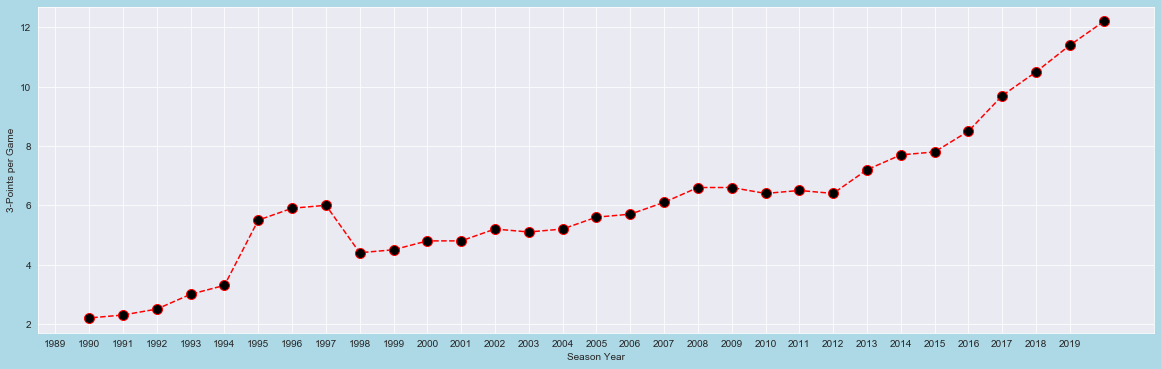

In [87]:
evolution_plot(df['3P'])
plt.ylabel('3-Points per Game')
plt.show()

This was expected! With a faster pace of the game, higher scoring rate, weaker defense, you would definitely expect more 3-Point shooting to be taking place. Now this doesn't necessarily mean that team score 3-Pointers at a better rate, we will see that in the next plot, but it means that they make more 3-Pointers per game, and at a considerable high rate going from 2 per game to over 12 per game. This translates as 30 points, but wince these were 2-Points before, it represents an increase in scoring of 10 points more. 

### 3-Point Percentage

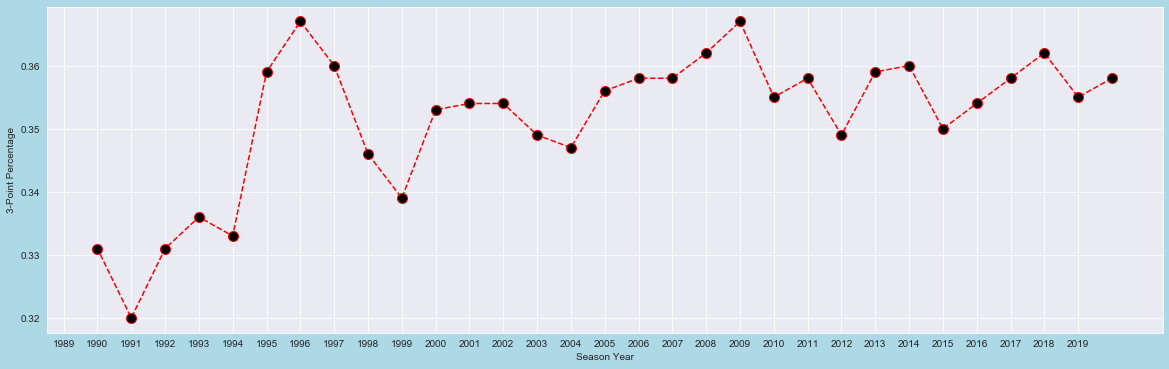

In [88]:
evolution_plot(df['3P%'])
plt.ylabel('3-Point Percentage')
plt.show()

There was a general increase that reached the highest of the 

### Assists per Game

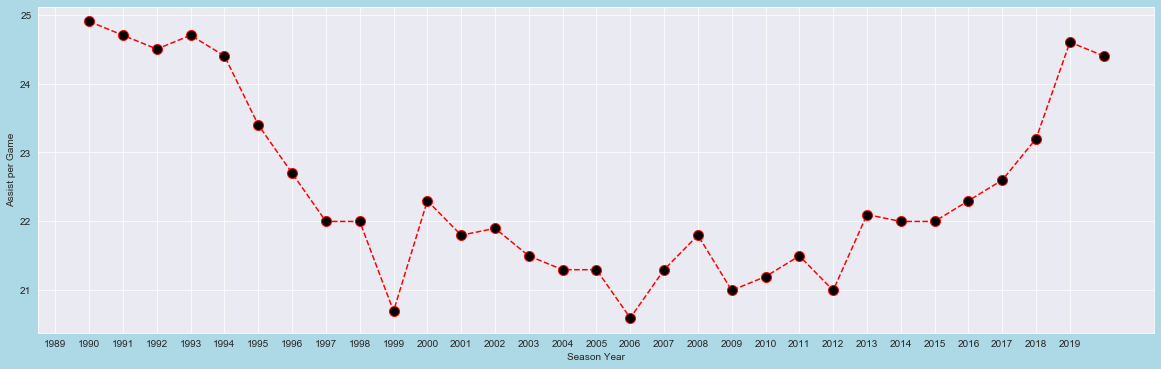

In [79]:
evolution_plot(df.AST)
plt.ylabel('Assist per Game')
plt.show()

Assists per game is also related to the scoring. The more assists a team makes, the more likely it is that they will score more. There was a hump for over 10 year when the assists per game decrease, and this is probably due to the presence of very good individual players such as Kobe, Iverson, Wade, and a bunch of others that could create their own shot without passing the ball, and in many cases due to having a weak cast of role players around them, they were force to do so. So here you see that trend clearly. In today's game the assist are peaking once again.

### Field Goal Attemps (FGA)

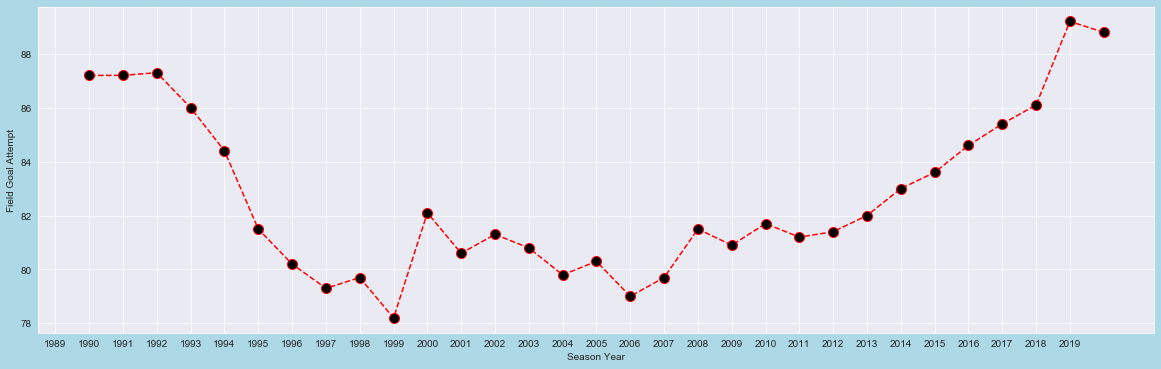

In [81]:
evolution_plot(df['FGA'])
plt.ylabel('Field Goal Attempt')
plt.show()

This is another stat related to the pace of the game, the faster you play the more chances you will have to shoot again, that means more shots in the same time frame.

### Field Goal Percentage (FG%)

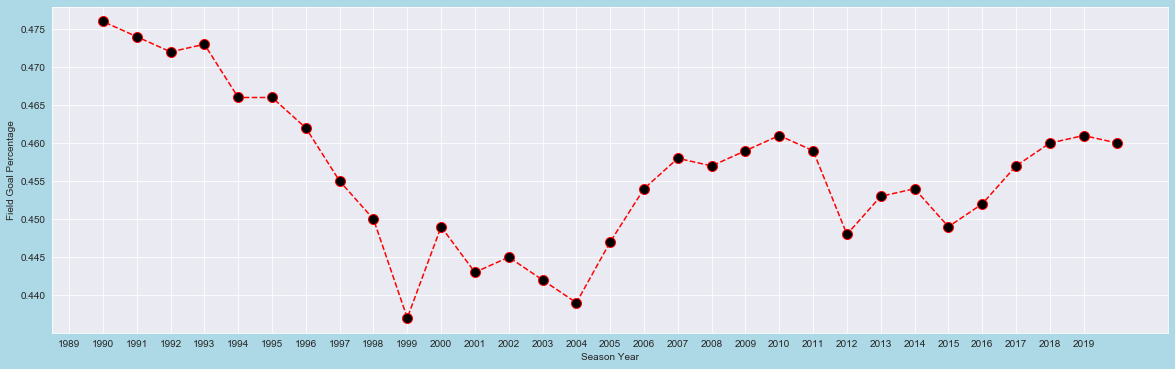

In [89]:
evolution_plot(df['FG%'])
plt.ylabel('Field Goal Percentage')
plt.show()

### Offensive Rating (ORtg)

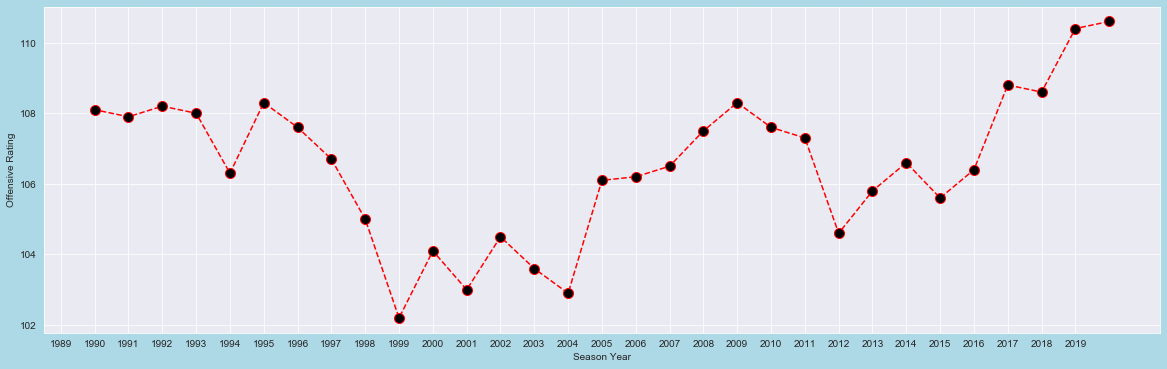

In [82]:
evolution_plot(df.ORtg)
plt.ylabel('Offensive Rating')
plt.show()

Offensive Rating, ass with the pace of the game, and with the points per game, has increased in recent years.  

### Free Throw Attemps

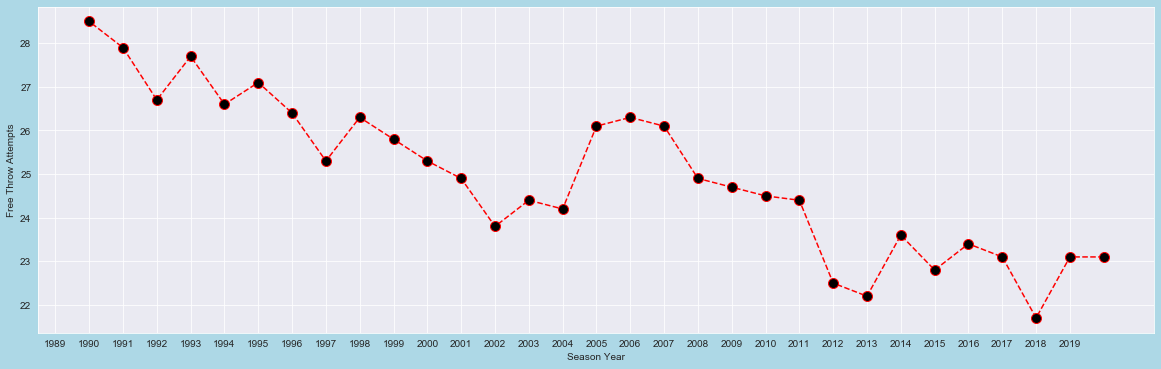

In [86]:
evolution_plot(df['FTA'])
plt.ylabel('Free Throw Attempts')
plt.show()

With a softer defense, there are less fouls and that means less free throws. One more proof of that the defense has weaken compared to the past 10, 20 and even 30 years. 